In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('food_nutrition.csv')

In [165]:
df.head(10)

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,Poultry Products,"Turkey, all classes, wing, meat and skin, raw",20.22,12.32,0.00,0.00,0.0,3
1,Fruits and Fruit Juices,"Pears, raw, green anjou",0.44,0.10,15.79,9.73,3.1,1
2,Fruits and Fruit Juices,"Maraschino cherries, canned, drained",0.22,0.21,41.97,38.77,3.2,2
3,Poultry Products,"Chicken, stewing, meat only, cooked, stewed",30.42,11.89,0.00,0.00,0.0,34
4,Breakfast Cereals,"Cereals ready-to-eat, wheat and bran, presweet...",7.10,5.60,76.20,23.60,9.7,410
5,Fruits and Fruit Juices,"Pears, raw, bartlett",0.39,0.16,15.01,9.69,3.1,1
6,Vegetables and Vegetable Products,"Eggplant, cooked, boiled, drained, with salt",0.83,0.23,8.14,3.20,2.5,2
7,Vegetables and Vegetable Products,"Beans, snap, green, frozen, all styles, unprep...",1.79,0.21,7.54,2.21,2.6,27
8,Poultry Products,"Chicken, broilers or fryers, back, meat and sk...",25.95,20.97,0.00,0.00,0.0,105
9,Fruits and Fruit Juices,"Blackberries, canned, heavy syrup, solids and ...",1.31,0.14,23.10,19.70,3.4,11


In [166]:
df.tail()

,Type,Description,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
229,Breakfast Cereals,"Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...",8.30,4.09,81.40,21.2,8.7,502
230,Breakfast Cereals,"Cereals ready-to-eat, POST, HONEY BUNCHES OF O...",7.00,5.40,82.00,21.9,5.2,748
231,Vegetables and Vegetable Products,"Squash, winter, all varieties, cooked, baked, ...",0.89,0.35,8.85,3.3,2.8,261
232,Breakfast Cereals,"Cereals ready-to-eat, GENERAL MILLS, Berry Bur...",8.80,4.50,80.50,27.0,7.6,549
233,Breakfast Cereals,"Cereals ready-to-eat, KASHI, HEART TO HEART, O...",10.39,3.29,80.00,22.5,8.1,114


In [167]:
data_reduced = df.drop(['Type','Description'], axis=1)
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,20.22,12.32,0.00,0.00,0.0,3
1,0.44,0.10,15.79,9.73,3.1,1
2,0.22,0.21,41.97,38.77,3.2,2
3,30.42,11.89,0.00,0.00,0.0,34
4,7.10,5.60,76.20,23.60,9.7,410


In [168]:
# scaling the data before PCA
from sklearn.preprocessing import scale
data_reduced = pd.DataFrame(scale(data_reduced), columns=['Protein_g','Fat_g','Carb_g','Sugar_g','Fiber_g','VitA_mcg'])
data_reduced.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
0,1.153152,1.148197,-0.882867,-0.882157,-0.842420,-0.705447
1,-0.863316,-0.718567,-0.389671,-0.106403,-0.137179,-0.713113
2,-0.885743,-0.701763,0.428055,2.208901,-0.114429,-0.709280
3,2.192989,1.082509,-0.882867,-0.882157,-0.842420,-0.586625
4,-0.184363,0.121629,1.497219,0.999426,1.364302,0.854573


In [169]:
data_reduced.describe()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02
mean,9.299304e-17,-1.290516e-16,6.737251e-17,-3.795634e-17,-3.795634e-17,-7.591269e-18
std,1.002144e+00,1.002144e+00,1.002144e+00,1.002144e+00,1.002144e+00,1.002144e+00
min,-9.081712e-01,-7.338435e-01,-8.828668e-01,-8.821574e-01,-8.424199e-01,-7.169462e-01
25%,-7.960320e-01,-7.032909e-01,-6.754683e-01,-7.876796e-01,-5.694233e-01,-7.092803e-01
50%,-4.137390e-01,-4.130412e-01,-4.330868e-01,-5.767987e-01,-2.509274e-01,-5.923746e-01
75%,3.286739e-01,3.813265e-01,1.443027e+00,6.858951e-01,3.348777e-01,7.539573e-01
max,2.192989e+00,5.480556e+00,1.906394e+00,3.677493e+00,8.826207e+00,2.897548e+00


In [170]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data_reduced)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_reduced)
pca_samples=pd.DataFrame(pca_samples)
pca_samples

,0,1,2,3,4,5
0,-2.161909,0.853362,0.007282,-0.102470,0.021060,-0.004907
1,-0.166195,-1.352740,0.033768,-0.275861,0.126770,0.036469
2,1.362076,-0.891322,-1.193570,-1.565748,-0.026034,0.573673
3,-2.395938,1.500917,0.098155,-0.078559,-0.756719,0.103848
4,2.213658,0.846074,0.319770,-0.275410,0.158763,-0.247958
...,...,...,...,...,...,...
229,2.272431,0.869825,0.173049,0.143980,-0.106616,-0.436149
230,2.326240,1.131956,-0.687909,1.003039,0.074479,-0.413319
231,-0.164025,-1.104316,0.111743,0.833343,0.179939,0.137564
232,2.409426,1.019312,-0.286219,0.094634,-0.134406,-0.189218


In [171]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    
    # PCA cumulative explained variance
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [172]:
pca_results = pca_results(data_reduced, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
PC 1,3.3609,0.5578,0.5578,-0.2884,-0.2594,0.5052,0.4757,0.4466,0.4106
PC 2,1.6162,0.2682,0.8260,0.6283,0.6547,0.2250,0.1195,0.1158,0.3136
PC 3,0.4188,0.0695,0.8955,0.1016,-0.0431,-0.1233,-0.4933,0.8411,-0.1477
PC 4,0.3982,0.0661,0.9616,-0.0793,-0.1393,-0.1604,-0.4999,-0.1705,0.8183
PC 5,0.1595,0.0265,0.9880,-0.7065,0.6943,-0.0963,-0.0447,0.0842,0.0211
PC 6,0.0722,0.0120,1.0000,0.0796,-0.0286,-0.8025,0.5140,0.2085,0.2030


<Figure size 432x288 with 0 Axes>

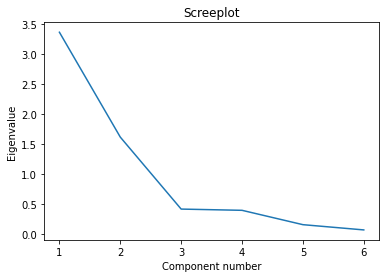

In [173]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [174]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(data_reduced)
scores2 = pca2.transform(data_reduced)

In [175]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

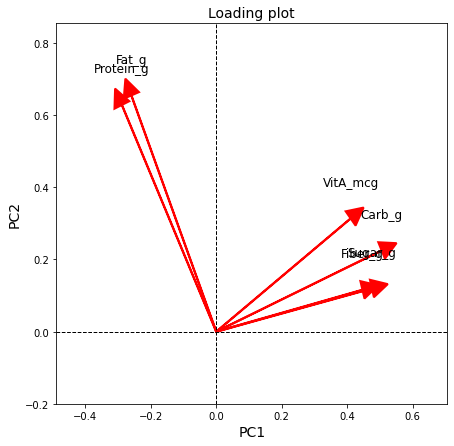

In [176]:
plt.clf
ax2 = loadingplot(data_reduced, pca2, width=7, height=7, margin=0.2)
plt.show()

In [177]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_reduced, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()

,PC1,PC2
0,-2.161909,0.853362
1,-0.166195,-1.352740
2,1.362076,-0.891322
3,-2.395938,1.500917
4,2.213658,0.846074


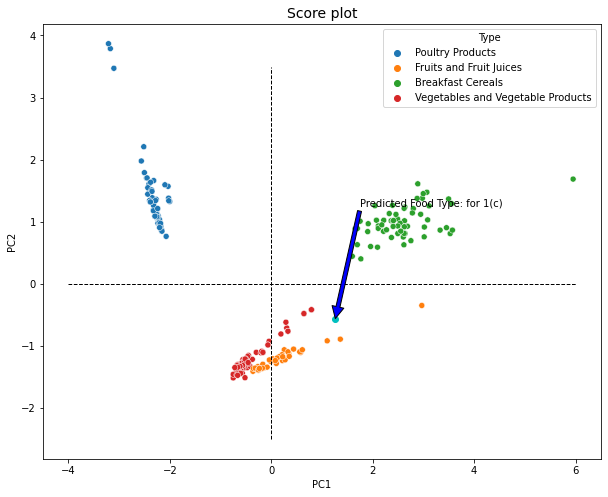

In [178]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=3, height=3, margin=0.5):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=data.Type)
    
    #Set limits for figure
#     x_min = min(scores['PC1'].min(),0)-margin
#     x_max = max(scores['PC1'].max(),0)+margin
#     y_min = min(scores['PC2'].min(),0)-margin
#     y_max = max(scores['PC2'].max(),0)+margin
    ax.annotate('Predicted Food Type: for 1(c)',
            xy=(1.26356,-0.56),  # theta, radius
            xytext=(0.5, 0.5),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='blue', shrink=1),
            horizontalalignment='left',
            verticalalignment='bottom')
    ax.plot(1.26356,-0.56, 'co')
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([-4, 6], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [-2.5, 3.5], color='k', linestyle='--', linewidth=1)
    return ax
plt.clf
ax3 = scoreplot_label(df, scores2_notcentred, pca2, width=5, height=4, margin=50)
plt.show()

In [179]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=3, height=3, margin=0.5):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=data.Type)
    
    #Set limits for figure
#     x_min = min(scores['PC1'].min(),0)-margin
#     x_max = max(scores['PC1'].max(),0)+margin
#     y_min = min(scores['PC2'].min(),0)-margin
#     y_max = max(scores['PC2'].max(),0)+margin
  
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([-4, 6], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [-2.5, 3.5], color='k', linestyle='--', linewidth=1)
    return ax

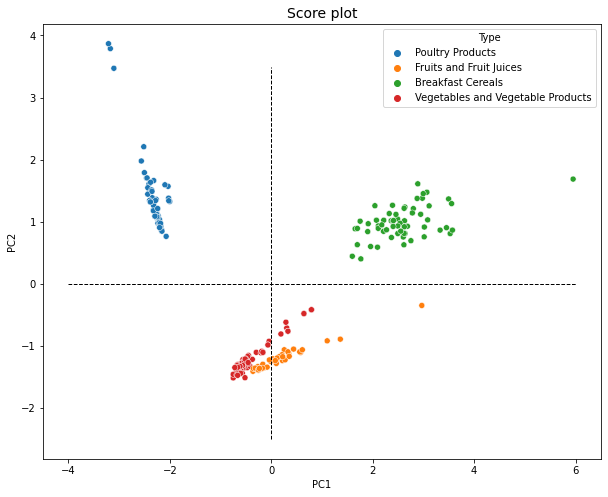

In [180]:
plt.clf
ax3 = scoreplot_label(df, scores2_notcentred, pca2, width=5, height=4, margin=50)
plt.show()

In [181]:



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('food_nutrition.csv')
data_reduced = df1.drop(['Type','Description'], axis=1)
# data_reduced=data_reduced.append(Food_X,ignore_index=True)

In [182]:
data_reduced.tail()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
229,8.30,4.09,81.40,21.2,8.7,502
230,7.00,5.40,82.00,21.9,5.2,748
231,0.89,0.35,8.85,3.3,2.8,261
232,8.80,4.50,80.50,27.0,7.6,549
233,10.39,3.29,80.00,22.5,8.1,114


In [183]:
# scaling the data before PCA
Food_Unknown ={
'Protein_g': 0.3, 
'Fat_g': 0.1 ,
'Carb_g': 19.6,
'Sugar_g': 16.7,
'Fiber_g': 2.9,
'VitA_mcg': 2
}
Food_X =[]
for i in Food_Unknown.values():
    Food_X.append(i)
Food_X=[Food_X]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_reduced)
Food_X=scaler.transform(Food_X)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [184]:
print(Food_X)

[[-0.87758779 -0.71856717 -0.27066624  0.44930193 -0.18267824 -0.70928026]]


In [185]:
z1=Food_X[-1,0]
z2=Food_X[-1,1]
z3=Food_X[-1,2]
z4=Food_X[-1,3]
z5=Food_X[-1,4]
z6=Food_X[-1,5]

In [186]:
#PC 1 ŷ= =-0.2884z1-0.2594z2+0.5052z3+0.4757z4+0.4466z5+0.4106z6
Food_X_PC1 = -0.2884*z1-0.2594*z2+0.5052*z3+0.4757*z4+0.4466*z5+0.4106*z6
#PC 2 
Food_X_PC2 =0.6283*z1+0.6547*z2+0.2250*z3+0.1195*z4+0.1158*z5+0.3136*z6

In [187]:
print("PC1 = "+str(Food_X_PC1))
print("PC2 = "+str(Food_X_PC2))

PC1 = 0.1436704085735956
PC2 = -1.272627091379175


In [188]:
# doing manual calculations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('food_nutrition.csv')
data_reduced = df1.drop(['Type','Description'], axis=1)
# data_reduced=data_reduced.append(Food_X,ignore_index=True)

In [189]:
data_reduced.describe()

,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,8.908462,4.803803,28.265556,11.064573,3.702991,187.047009
std,9.830258,6.560120,32.084279,12.569516,4.405083,261.453321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,0.200000,6.640000,1.185000,1.200000,2.000000
50%,4.850000,2.100000,14.400000,3.830000,2.600000,32.500000
75%,12.132500,7.300000,74.465000,19.667500,5.175000,383.750000
max,30.420000,40.680000,89.300000,57.190000,42.500000,943.000000


In [190]:
# scaling the data before PCA
Food_Unknown ={
'Protein_g': 0.3, 
'Fat_g': 0.1 ,
'Carb_g': 19.6,
'Sugar_g': 16.7,
'Fiber_g': 2.9,
'VitA_mcg': 2
}
Food_X =[]
for i in Food_Unknown.values():
    Food_X.append(i)
Food_X=Food_X


In [191]:
z1=(Food_X[0]-np.mean(data_reduced['Protein_g']))/np.std(data_reduced['Protein_g'])
z2=(Food_X[1]-np.mean(data_reduced['Fat_g']))/np.std(data_reduced['Fat_g'])
z3=(Food_X[2]-np.mean(data_reduced['Carb_g']))/np.std(data_reduced['Carb_g'])
z4=(Food_X[3]-np.mean(data_reduced['Sugar_g']))/np.std(data_reduced['Sugar_g'])
z5=(Food_X[4]-np.mean(data_reduced['Fiber_g']))/np.std(data_reduced['Fiber_g'])
z6=(Food_X[5]-np.mean(data_reduced['VitA_mcg']))/np.std(data_reduced['VitA_mcg'])

In [192]:
#PC 1 ŷ= =-0.2884z1-0.2594z2+0.5052z3+0.4757z4+0.4466z5+0.4106z6
Food_X_PC1 = -0.2884*z1-0.2594*z2+0.5052*z3+0.4757*z4+0.4466*z5+0.4106*z6
#PC 2 
Food_X_PC2 =0.6283*z1+0.6547*z2+0.2250*z3+0.1195*z4+0.1158*z5+0.3136*z6

In [193]:
print("PC1 = "+str(Food_X_PC1))
print("PC2 = "+str(Food_X_PC2))

PC1 = 0.1436704085735956
PC2 = -1.272627091379175


In [194]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=3, height=3, margin=0.5):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=data.Type)
    
    #Set limits for figure
#     x_min = min(scores['PC1'].min(),0)-margin
#     x_max = max(scores['PC1'].max(),0)+margin
#     y_min = min(scores['PC2'].min(),0)-margin
#     y_max = max(scores['PC2'].max(),0)+margin
    ax.annotate('Predicted Food Type:Fruit and Fruit Juices',
            xy=(Food_X_PC1,Food_X_PC2),  # theta, radius
            xytext=(0.5, 0.5),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='blue', shrink=1),
            horizontalalignment='left',
            verticalalignment='bottom')
    ax.plot(Food_X_PC1,Food_X_PC2, 'co')
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([-4, 6], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [-2.5, 3.5], color='k', linestyle='--', linewidth=1)
    return ax

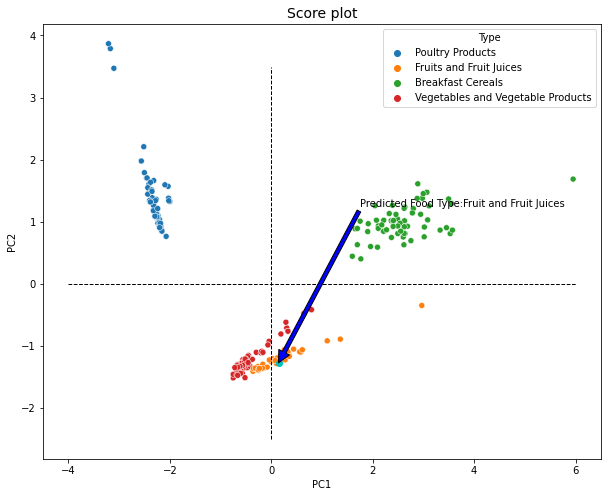

In [195]:
plt.clf
ax3 = scoreplot_label(df, scores2_notcentred, pca2, width=5, height=4, margin=50)
plt.show()